In [1]:
!pip install modelviz-ai

In [2]:
import torch.nn as nn
from modelviz import visualize, visualize_threejs

class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 8 * 8, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 10),
        )

    def forward(self, x):
        return self.classifier(self.features(x))

model = CNN()


# 2D diagram with layer grouping

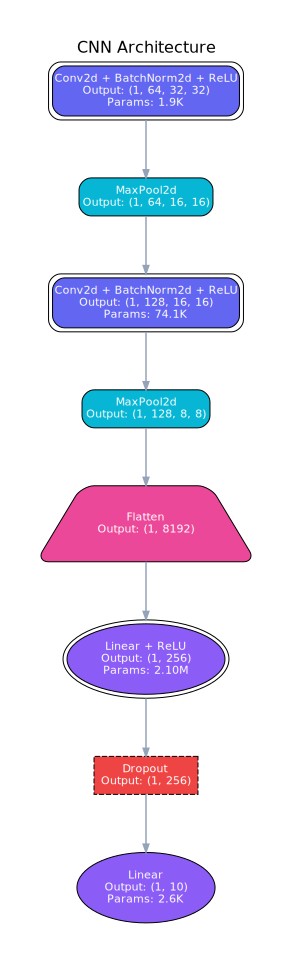

In [3]:
visualize(model, input_shape=(1, 3, 32, 32), title="CNN Architecture")

# 3D interactive visualization

In [4]:
visualize_threejs(model, input_shape=(1, 3, 32, 32), save_path="cnn_3d.html")

'<!DOCTYPE html>\n<html lang="en">\n<head>\n    <meta charset="UTF-8">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\n    <title>Neural Network Architecture - 3D View</title>\n    <style>\n        * {\n            margin: 0;\n            padding: 0;\n            box-sizing: border-box;\n        }\n        body {\n            font-family: \'Segoe UI\', system-ui, -apple-system, sans-serif;\n            background: linear-gradient(135deg, #0f172a 0%, #1e293b 50%, #0f172a 100%);\n            overflow: hidden;\n        }\n        #container {\n            width: 100vw;\n            height: 100vh;\n            position: relative;\n        }\n        #title {\n            position: absolute;\n            top: 20px;\n            left: 50%;\n            transform: translateX(-50%);\n            color: #f8fafc;\n            font-size: 24px;\n            font-weight: 600;\n            text-shadow: 0 2px 10px rgba(0,0,0,0.5);\n            z-index: 100;\n            l